In [2]:
from __future__ import print_function
from __future__ import absolute_import

%matplotlib inline

import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300

# Modeling Exercise

This exercise is designed to both help you to learn `git` and `github` as well as some concepts from modeling that will be important.  If you need some ideas take a look at the [course notes](http://github.com/mandli/intro-numerical-methods).

## Reading Data

Take the data you read in from `get_hydro_data.ipynb` and write a function that read in the stream flow data and precip and returns the data

In [3]:
def read_streamflow_data(path):
    """"""
  
    return pd.read_csv(path, parse_dates=['dateTime'], usecols=['dateTime', 'X_00060_00000'])



In [4]:
prcp=read_streamflow_data('temp_data/streamflow_data.csv')

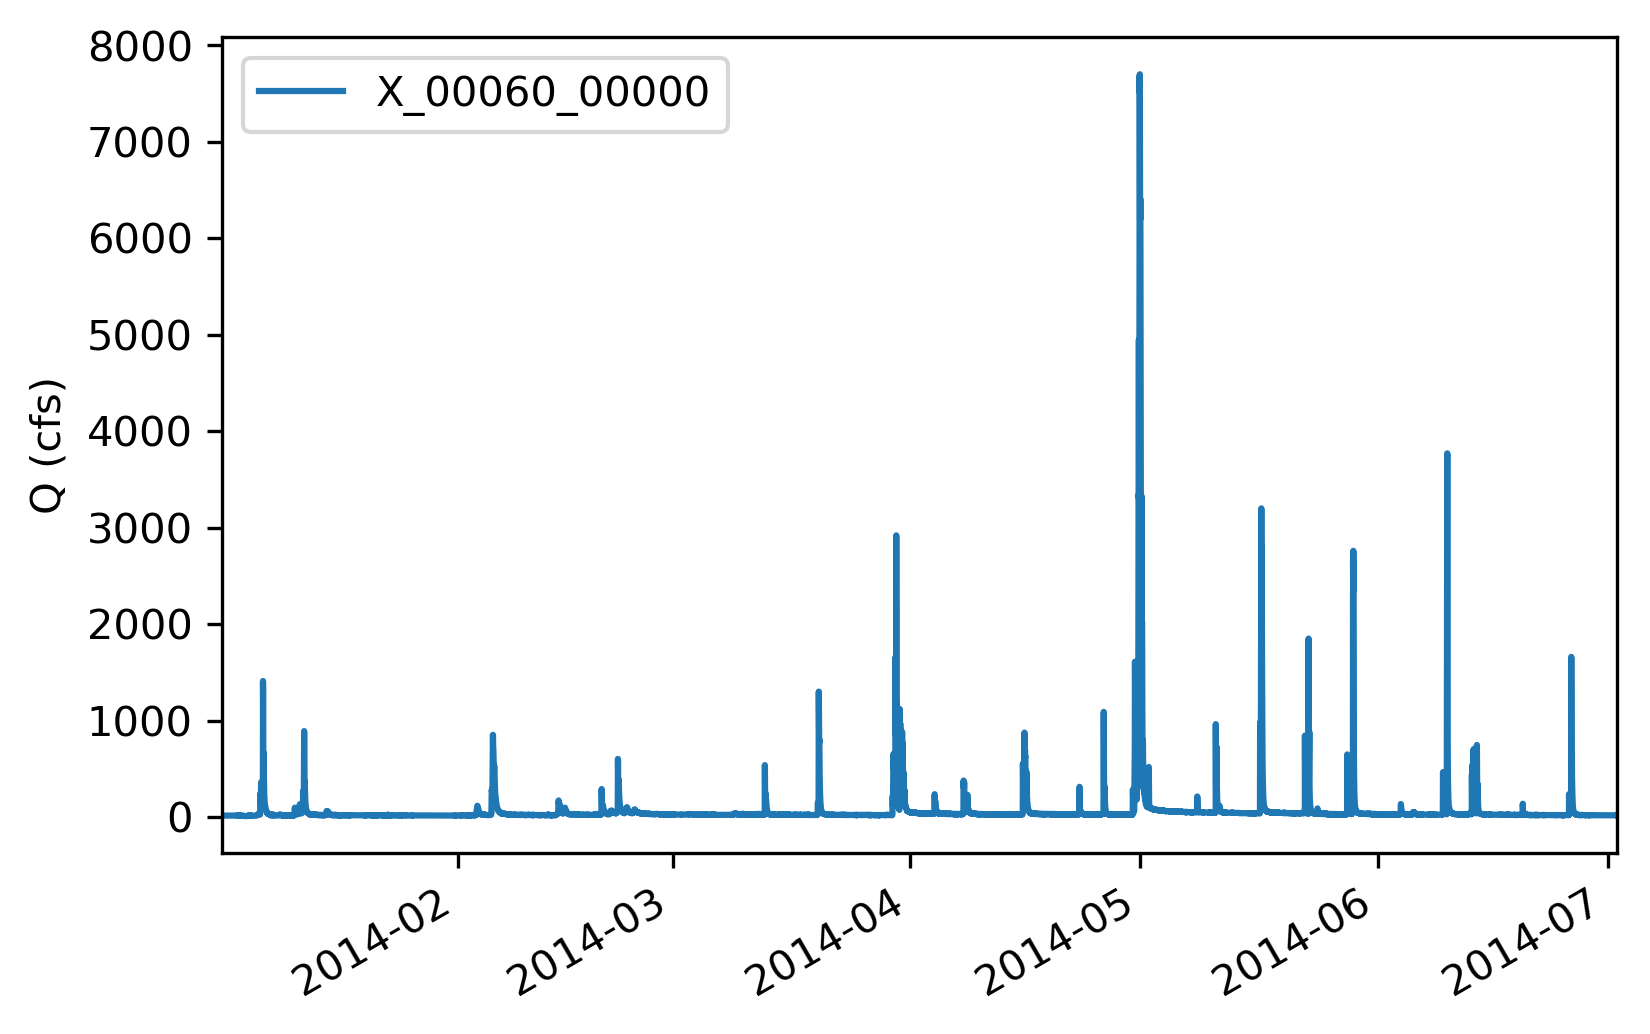

In [12]:
prcp.plot(x='dateTime')
plt.xlabel('')
plt.ylabel('Q (cfs)');

## Plot the Data

Now write a function that plots the data you read in from above.

In [ ]:
def plot_streamflow_data(x, y):
    """"""
    
    pass

## Make a Model

Write a function that takes the data from above and fits a curve to it.  Justify your approach to this problem as well.

In [ ]:
def fit_streamflow_data(x, y):
    """"""
    
    pass

## Pull It All Together

Use all three functions above and make a prediction where there is no data.  Think about where your prediction may be valid or invalid.  Make sure to mention this in your `doc-string`.

In [ ]:
def streamflow_prediction(x, y):
    """"""
    
    pass